In [1]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib inline
# plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams.update({'font.size': 17})

plotting for the 'no capacity' simulations

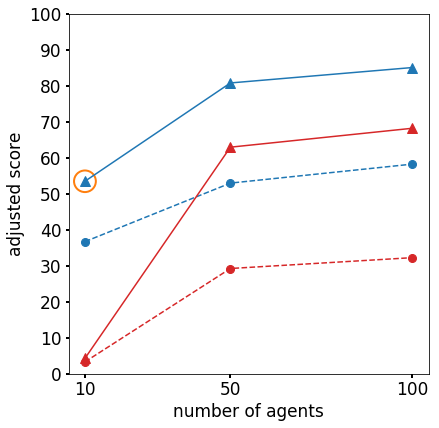

In [113]:
agents = [10,50,100]
h_nc_16 = [36.71,52.97,58.24]
h_nc_100 = [3.31,29.25,32.26]
n_nc_16 = [53.48,80.79,85.07]
n_nc_100 = [4.29,62.95,68.20]

fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax = fig.add_subplot(111)
ax.set_xticks([10,50,100])
ax.set_yticks([t for t in range(0,110,10)])
ax.set_ylim([0,100])
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
ax.set_xlabel('number of agents')
ax.set_ylabel('adjusted score')
# ax.set_title('Unlimited Capacity')
# ax.axis('equal')

plt.plot(agents,h_nc_16,'C0--o',markersize=8,label='Heuristic, 4x4 fires')
plt.plot(agents,h_nc_100,'C3--o',markersize=8,label='Heuristic, 10x10 fires')
plt.plot(agents,n_nc_16,'C0-^',markersize=10,label='Network, 4x4 fires')
plt.plot(agents,n_nc_100,'C3-^',markersize=10,label='Network, 10x10 fires')

circle1 = plt.Circle((10, 53.48), 3, color='C1',fill=False,lw=2)
ax.add_artist(circle1)

# plt.plot(10,n_nc_16[0],'C1^',markersize=10,zorder=2)

# ax.legend(loc='upper left',  bbox_to_anchor=(-0.85,1), ncol=1, prop={'size':15})
# plt.savefig('experiment1.pdf', dpi=300, bbox_inches='tight')

plotting for new formatting of results files

In [44]:
filename = 'simple_ext_cappedparam_g50+a100+f16+s1000.pkl'

with open(filename, 'rb') as f:
    results = pickle.load(f)
    
fracs = [results[key]['frac_healthy'] for key in results.keys()]
abv = [x for x in fracs if x >= np.mean(fracs)]

print('win percent / win mean =  %0.4f / %0.4f' %(100.0*len(abv)/len(fracs),np.mean(abv)*100))

adj_score = (len(abv)/len(fracs))*np.mean(abv)*100
print('adjusted score = %0.4f' %adj_score)

cut_low = 0.2
cut_high = 0.8
total = len(fracs)

low = [x for x in fracs if x <= cut_low]
med = [x for x in fracs if x > cut_low and x <= cut_high]
high = [x for x in fracs if x > cut_high]

low_per = 100.0*len(low)/len(fracs)
med_per = 100.0*len(med)/len(fracs)
high_per = 100.0*len(high)/len(fracs)

print('splits: %0.1f / %0.1f / %0.1f = %0.1f' %(low_per,med_per,high_per,low_per+med_per+high_per))

win percent / win mean =  65.8000 / 96.3279
adjusted score = 63.3838
splits: 26.9 / 8.6 / 64.5 = 100.0


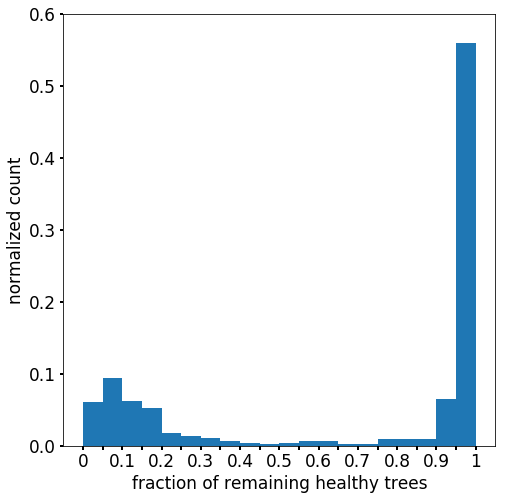

In [45]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax = fig.add_subplot(111)
weights = np.ones_like(fracs)/float(len(fracs))
splits, _, _ = plt.hist(fracs, bins=np.arange(0,1+0.05,0.05), normed=False, weights=weights, color='C0', alpha=1)
# plt.axvline(np.amin(fracs),color="C2",label="%0.2f%%" % (np.amin(fracs)*100),linewidth=2.5)
# plt.axvline(np.mean(fracs),color="C1",label="mean = %0.2f%%" %(np.mean(fracs)*100),linewidth=2.5)
# plt.axvline(np.amax(fracs),color="C3",label="max = %0.2f%%" %(np.amax(fracs)*100),linewidth=2.5)

plt.ylim([0,0.6])
plt.xticks(np.arange(0,1+0.05,0.05))
plt.xlabel('fraction of remaining healthy trees')
plt.ylabel('normalized count')

ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
for idx,label in enumerate(ax.xaxis.get_ticklabels()):
    if idx % 2 != 0:
        label.set_visible(False)

# plt.savefig('sample_results_net.pdf', dpi=300, bbox_inches='tight')

In [5]:
splits

array([ 0.117,  0.183,  0.085,  0.025,  0.016,  0.01 ,  0.004,  0.003,
        0.002,  0.   ,  0.   ,  0.   ,  0.001,  0.   ,  0.002,  0.005,
        0.002,  0.009,  0.045,  0.491])

code for legacy results files

In [43]:
filename = 'simple_ext_50+10+100+1000.pkl'

with open(filename, 'rb') as f:
    fracs = pickle.load(f)

fracs = [1-x for x in fracs]
abv = [x for x in fracs if x >= np.mean(fracs)]

print('win percent / win mean =  %0.4f / %0.4f' %(100.0*len(abv)/len(fracs),np.mean(abv)*100))

adj_score = (len(abv)/len(fracs))*np.mean(abv)*100
print('adjusted score = %0.4f' %adj_score)

cut_low = 0.2
cut_high = 0.8
total = len(fracs)

low = [x for x in fracs if x <= cut_low]
med = [x for x in fracs if x > cut_low and x <= cut_high]
high = [x for x in fracs if x > cut_high]

low_per = 100.0*len(low)/len(fracs)
med_per = 100.0*len(med)/len(fracs)
high_per = 100.0*len(high)/len(fracs)

print('splits: %0.1f / %0.1f / %0.1f = %0.1f' %(low_per,med_per,high_per,low_per+med_per+high_per))

win percent / win mean =  5.8000 / 74.0159
adjusted score = 4.2929
splits: 95.3 / 0.2 / 4.5 = 100.0
